In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load the dataset
file_path = "chennai-ground-water-levels-2023.csv"  # Replace with your file path
df = pd.read_csv(file_path)

In [3]:
# Load dataset
file_path = "chennai-ground-water-levels-2023.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

In [6]:
# Columns for groundwater levels
months = ["Jan ", "Feb", "Mar", "Apr ", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_filtered = df[["Location"] + months]
# Convert monthly values to numeric (handling errors if any)
df_filtered[months] = df_filtered[months].apply(pd.to_numeric, errors='coerce')

C:\Users\rumma\AppData\Local\Temp\ipykernel_7116\394866554.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[months] = df_filtered[months].apply(pd.to_numeric, errors='coerce')


In [7]:
# Select a specific location for forecasting (e.g., Kathivakkam)
location = "Kathivakkam"
df_location = df_filtered[df_filtered["Location"] == location].iloc[:, 1:].mean().to_frame()
df_location.columns = ["Groundwater Level"]
df_location.index = pd.date_range(start="2023-01", periods=12, freq="M")  # Monthly index

C:\Users\rumma\AppData\Local\Temp\ipykernel_7116\833634329.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_location.index = pd.date_range(start="2023-01", periods=12, freq="M")  # Monthly index


In [8]:
# Prepare Data
X = np.array(range(1, 13)).reshape(-1, 1)  # Months as numerical values
y = df_location["Groundwater Level"].values  # Groundwater levels

In [9]:
# Split into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [10]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predict
y_pred = model.predict(X_test)

In [12]:
# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")

Mean Absolute Error: 0.217
Root Mean Squared Error: 0.241


In [13]:

# Future Predictions (next 6 months)
future_months = np.array(range(13, 19)).reshape(-1, 1)  # Extend timeline
future_predictions = model.predict(future_months)

C:\Users\rumma\AppData\Local\Temp\ipykernel_7116\3642155320.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start="2024-01", periods=6, freq="M"), future_predictions, marker='x', linestyle="dashed", label="Predicted")


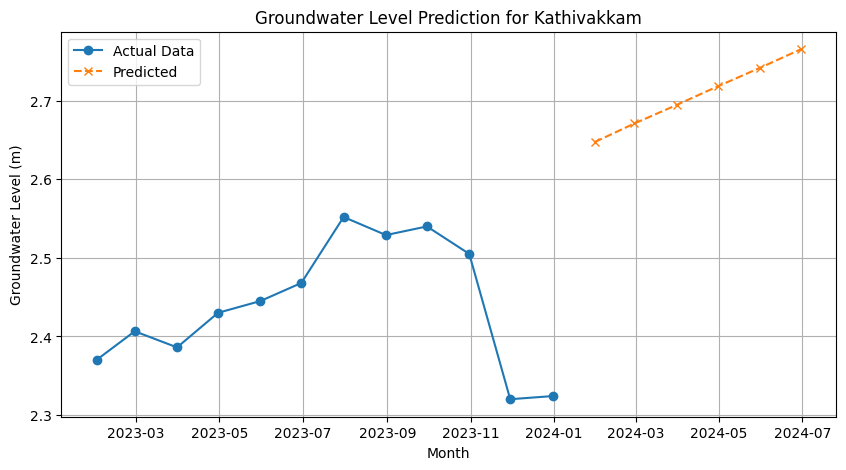

In [14]:
# Plot results
plt.figure(figsize=(10, 5))
plt.plot(df_location.index, df_location["Groundwater Level"], marker='o', label="Actual Data")
plt.plot(pd.date_range(start="2024-01", periods=6, freq="M"), future_predictions, marker='x', linestyle="dashed", label="Predicted")
plt.xlabel("Month")
plt.ylabel("Groundwater Level (m)")
plt.title(f"Groundwater Level Prediction for {location}")
plt.legend()
plt.grid()
plt.show()

🔍 What This Does:
✅ Handles duplicate locations by averaging records.
✅ Uses Linear Regression to predict future groundwater levels.
✅ Predicts next 6 months of groundwater levels.
✅ Plots actual vs. predicted trends.
